In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2025/DiffusionModels':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2025/DiffusionModels')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/7c/j9mzb7pn0wn1k_f9j58c8y480000gn/T/ipykernel_96872/2251642810.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1746004236.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1746004236.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1746004221.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1746004240.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1746004241.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1746004240.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1746004242.0, "/Library/Developer/CommandLineT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

In [3]:
p_data = np.array([0.40, 0.30, 0.18, 0.10, 0.02], dtype=float)

In [4]:
MASK = -1

In [5]:
T = 10
beta_sched = np.linspace(0.05, 0.25, T)
one_step_transition_prob = 1 - np.exp(-beta_sched)
alpha = np.empty(T + 1)  # survival prob α_t = ∏_{s=1}^t (1-β_s), α_0 = 1
alpha[0] = 1.0
for t in range(1, T + 1):
    alpha[t] = alpha[t - 1] * one_step_transition_prob[t - 1]

In [6]:
p_unmask = (alpha[:-1] - alpha[1:]) / (1.0 - alpha[1:])  # length T

In [7]:
def reverse_sample_unconditional(num_samples: int):
    """
    Start from x_T = MASK for all samples, apply the exact reverse transitions down to t=0.
    Returns x_0 samples in {0,1,...,K-1}.
    """
    x_t = np.full(num_samples, MASK, dtype=int)
    for t in range(T, 0, -1):
        # indices currently MASK
        idx_mask = np.where(x_t == MASK)[0]
        if idx_mask.size > 0:
            # Unmask now with probability p_unmask[t-1]
            u = rng.random(idx_mask.size)
            unmask_now = idx_mask[u < p_unmask[t-1]]
            # Sample categories for those that unmask now (from p_data)
            if unmask_now.size > 0:
                # Draw categorical according to p_data
                cats = rng.choice(5, size=unmask_now.size, p=p_data)
                x_t[unmask_now] = cats

        # Non-MASK tokens are carried back deterministically (x_{t-1} = x_t)
        # so nothing else to do in this loop.
    # At t=0, all remaining MASKs (if any) must have already unmasked earlier with probability 1,
    # but numerically we ensure no MASK remains:
    assert np.all(x_t != MASK), "Some samples remained MASK at t=0, which should not happen."
    return x_t

Toy data marginal p_data: [0.4  0.3  0.18 0.1  0.02]
Empirical p after reverse sampling: [0.4006 0.3016 0.1786 0.0993 0.0199]
L1 distance: 0.0044    KL(p_emp || p_data): 1.3e-05


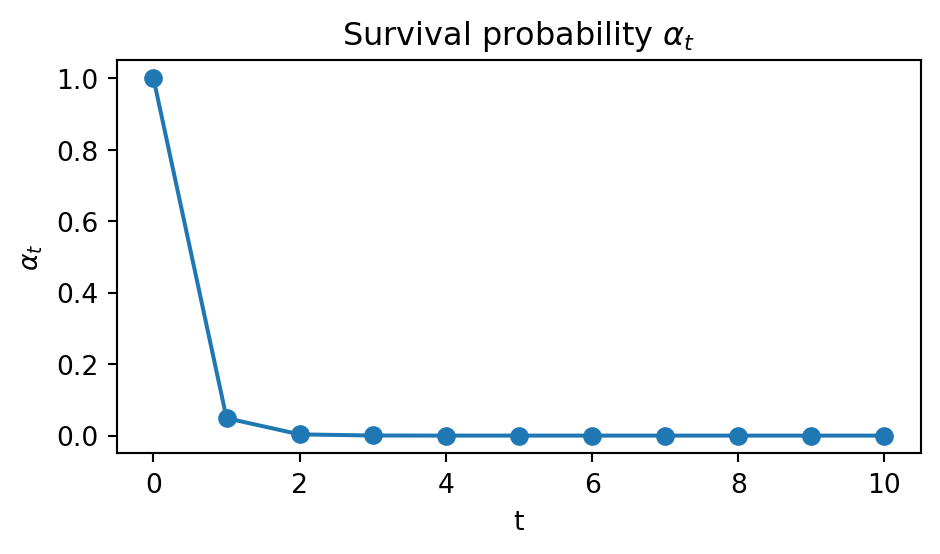

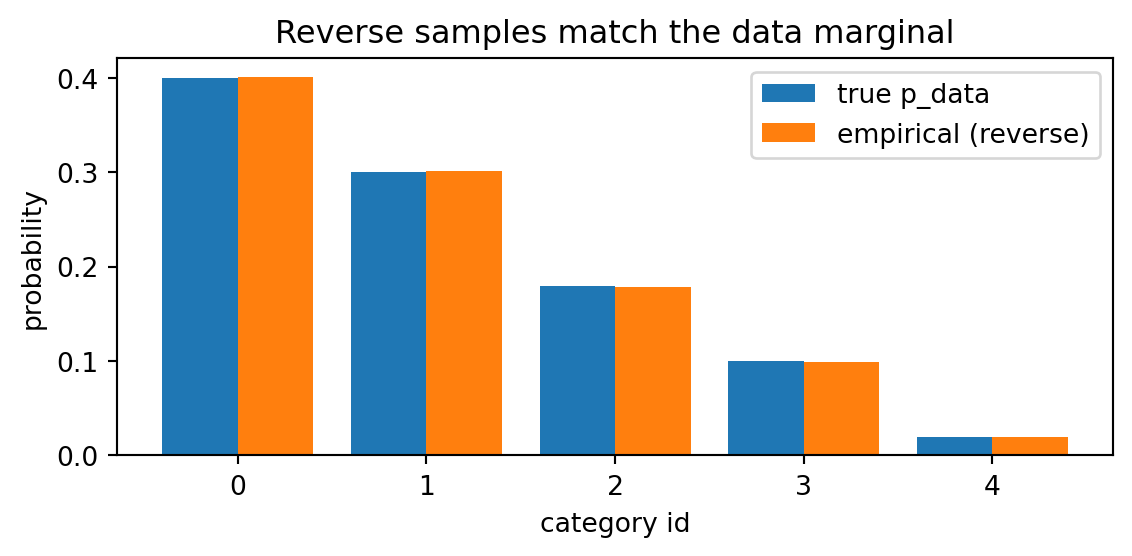

Forward→Reverse (unconditional) check:
Empirical p after forward→(discard)→reverse: [0.4023 0.2986 0.1788 0.1    0.0203]


In [8]:
# ---------- Run the experiment ----------
N = 100_000
x0_samples = reverse_sample_unconditional(N)

# Empirical histogram vs true p_data
counts = np.bincount(x0_samples, minlength=5).astype(float)
p_emp = counts / counts.sum()

# L1 distance and KL (empirical → true) for sanity check
l1 = np.abs(p_emp - p_data).sum()
kl = (np.where(p_emp > 0, p_emp * np.log(p_emp / p_data), 0)).sum()

print("Toy data marginal p_data:", p_data.round(4))
print("Empirical p after reverse sampling:", p_emp.round(4))
print("L1 distance:", round(l1, 6), "   KL(p_emp || p_data):", round(kl, 6))

# ---------- Plot schedule α_t (survival probability) ----------
plt.figure(figsize=(5,3))
plt.plot(range(T+1), alpha, marker="o")
plt.title(r"Survival probability $\alpha_t$")
plt.xlabel("t")
plt.ylabel(r"$\alpha_t$")
plt.tight_layout()
plt.show()

# ---------- Bar chart: p_data vs empirical ----------
xs = np.arange(5)
width = 0.4
plt.figure(figsize=(6,3))
plt.bar(xs - width/2, p_data, width=width, label="true p_data")
plt.bar(xs + width/2, p_emp, width=width, label="empirical (reverse)")
plt.title("Reverse samples match the data marginal")
plt.xlabel("category id")
plt.ylabel("probability")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- (Optional) forward→reverse sanity: start from data, mask to t=T, then reverse ----------
def forward_to_T(x0):
    xt = x0.copy()
    for t in range(1, T + 1):
        # mask each non-MASK with prob β_t
        keep = rng.random(xt.size) >= beta_sched[t - 1]
        xt = np.where((xt != MASK) & keep, xt, MASK)
    return xt

x0_true = rng.choice(5, size=N, p=p_data)
xT = forward_to_T(x0_true)
x0_rec = reverse_sample_unconditional(N)  # unconditional reverse from MASK
# Note: reverse from MASK does not reconstruct the *same* x0_true, but its marginal is p_data.
counts_rec = np.bincount(x0_rec, minlength=5).astype(float)
p_emp_rec = counts_rec / counts_rec.sum()

print("Forward→Reverse (unconditional) check:")
print("Empirical p after forward→(discard)→reverse:", p_emp_rec.round(4))